## 2) 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보 시트 데이터와 서울특별시 코로나19 백신 예방접종 현황 시트 데이터를 사용하여
2021년 1월부터 2021년 9월까지의  2차 누적접종률을 월 단위로 막대그래프로 출력하고(데이터가 없을 경우 0 표기), 호선별 월 이용 인원을 꺾은선 그래프로 함께 출력하시오.


In [17]:
# Pandas 라이브러리 불러오기
import pandas as pd

# numpy 라이브러리 불러오기
import numpy as np

# matplotlib 라이브러리 불러오기
from matplotlib import pyplot as plt

In [18]:
# 2번 solution
# 2021년 1월부터 2021년 9월까지의 2차 누적접종률을 월 단위로 막대그래프로 출력하고(데이터가 없을 겨웅 0 표기), 
# 호선별 월 이용 인원을 꺾은선 그래프로 함게 출력하시오.

df2 = pd.read_excel('전공_파이썬데이터분석과제_이름_ID.xlsx', sheet_name = 4)

In [19]:
df2

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021.10.10,9505868,330,7480597,78.7,3236,5673019,59.6
1,2021.10.09,9505868,1373,7480266,78.7,15337,5669744,59.6
2,2021.10.08,9505868,6847,7479069,78.6,200186,5654619,59.4
3,2021.10.07,9505868,5982,7471415,78.6,138375,5353493,57.4
4,2021.10.06,9505868,6247,7464613,78.5,95261,5314014,55.9
...,...,...,...,...,...,...,...,...
168,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
169,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
170,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
171,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6


In [20]:
condition = (df2['접종일'] >= "2021.01.01") & (df2['접종일'] <= "2021.09.31") # 조건식 작성

In [21]:
df2 = df2[condition]
df2

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
10,2021.09.30,9505868,41307,7382559,77.7,156636,4786032,50.3
11,2021.09.29,9505868,67946,7314953,77.0,104742,4681112,49.2
12,2021.09.28,9505868,40336,7274915,76.5,105746,4575154,48.1
13,2021.09.27,9505868,47035,7228337,76.0,132787,4442337,46.7
14,2021.09.26,9505868,78584,7149465,75.2,139274,4302483,45.3
...,...,...,...,...,...,...,...,...
168,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
169,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
170,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
171,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6


In [22]:
df3 = pd.read_excel('전공_파이썬데이터분석과제_이름_ID.xlsx', sheet_name = 3)
df3

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202109,1호선,동대문,504,11,10220,1863,8046,5696,12719,...,6656,16,1094,1,0,0,0,0,0,20211003
1,202109,1호선,동묘앞,91,2,2562,828,3100,4244,5177,...,1860,1,961,0,0,0,0,0,0,20211003
2,202109,1호선,서울역,540,16,7420,5818,10588,32295,30994,...,5615,21,512,0,0,0,0,0,0,20211003
3,202109,1호선,시청,25,0,1677,4542,2640,17026,5680,...,855,5,103,0,0,0,0,0,0,20211003
4,202109,1호선,신설동,267,10,6634,2613,7049,9896,14872,...,4260,11,458,0,0,0,0,0,0,20211003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47154,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
47155,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
47156,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
47157,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


In [29]:
condition = (df3['사용월'] >= 202101) & (df3['사용월'] <= 202109) # 조건식 작성

In [30]:
df3 = df3[condition]
df3

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202109,1호선,동대문,504,11,10220,1863,8046,5696,12719,...,6656,16,1094,1,0,0,0,0,0,20211003
1,202109,1호선,동묘앞,91,2,2562,828,3100,4244,5177,...,1860,1,961,0,0,0,0,0,0,20211003
2,202109,1호선,서울역,540,16,7420,5818,10588,32295,30994,...,5615,21,512,0,0,0,0,0,0,20211003
3,202109,1호선,시청,25,0,1677,4542,2640,17026,5680,...,855,5,103,0,0,0,0,0,0,20211003
4,202109,1호선,신설동,267,10,6634,2613,7049,9896,14872,...,4260,11,458,0,0,0,0,0,0,20211003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,202101,중앙선,원덕,15,0,228,4,346,49,470,...,89,6,26,0,0,0,0,0,0,20210203
5456,202101,중앙선,중랑,75,1,4549,374,7275,1780,17855,...,1857,6,124,0,0,0,0,0,0,20210203
5457,202101,중앙선,지평,0,0,0,0,0,0,188,...,0,0,0,0,0,0,0,0,0,20210203
5458,202101,중앙선,팔당,0,0,110,55,418,386,849,...,115,0,0,0,0,0,0,0,0,20210203


#### 누적 접종률 월단위 막대그래프

<BarContainer object of 9 artists>

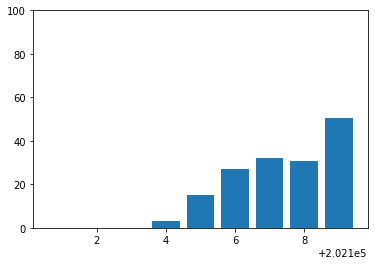

In [32]:
# calendar 라이브러리 불러오기
import calendar

# x축
x_data = ["21.01", "21.02", "21.03", "21.04", "21.05", "21.06", "21.07", "21.08", "21.09"]

# y축
y_data = []
for i in range(1,10):
    day = calendar.monthrange(2021,i)[1]
    condition = (df2['접종일'] == "2021." + "0" + str(i)+ "." + str(day)) # 조건식 작성
    if(len(df2[condition])==0):
        y_data.append(0)
    else:
        y_data.append(df2[condition]['2차접종률(%)'])
        
x_data2 = [202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109]

plt.ylim([0,100])

plt.bar(x_data2, y_data)
    

#### 호선별 월 이용 인원을 꺾은선 그래프

In [34]:
df_temp = df3.drop(['작업일자','사용월'], axis=1)
df3['총이용인원'] = df_temp.sum(axis=1)
df3

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,총이용인원
0,202109,1호선,동대문,504,11,10220,1863,8046,5696,12719,...,16,1094,1,0,0,0,0,0,20211003,569753
1,202109,1호선,동묘앞,91,2,2562,828,3100,4244,5177,...,1,961,0,0,0,0,0,0,20211003,508983
2,202109,1호선,서울역,540,16,7420,5818,10588,32295,30994,...,21,512,0,0,0,0,0,0,20211003,1873853
3,202109,1호선,시청,25,0,1677,4542,2640,17026,5680,...,5,103,0,0,0,0,0,0,20211003,899218
4,202109,1호선,신설동,267,10,6634,2613,7049,9896,14872,...,11,458,0,0,0,0,0,0,20211003,650554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,202101,중앙선,원덕,15,0,228,4,346,49,470,...,6,26,0,0,0,0,0,0,20210203,12668
5456,202101,중앙선,중랑,75,1,4549,374,7275,1780,17855,...,6,124,0,0,0,0,0,0,20210203,239216
5457,202101,중앙선,지평,0,0,0,0,0,0,188,...,0,0,0,0,0,0,0,0,20210203,2177
5458,202101,중앙선,팔당,0,0,110,55,418,386,849,...,0,0,0,0,0,0,0,0,20210203,44604


In [35]:
sorted_series3 = df3.groupby(['호선명','사용월'])['총이용인원'].sum()
sorted_df3 = pd.DataFrame(sorted_series3, columns=['총이용인원'])
pd.DataFrame(sorted_df3.loc['1호선', '총이용인원'])

,총이용인원
사용월,
202101,8982246
202102,9221920
202103,11501542
202104,11372871
202105,11195148
202106,11494793
202107,10136973
202108,9740681
202109,9980235


In [38]:
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# mac용 한글 폰트
# rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

table = sorted_df3.pivot_table(values='총이용인원', index='사용월', columns='호선명', fill_value=0)
table

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
사용월,,,,,,,,,,,,,,,,,,,,,
202101,8982246,56303019,21283426,20112122,25947793,13442450,29650569,8340897,11165664,3809017,...,1465364,3645026,4026415,15601566,2375496,5012935,1840911,4391493,487870,3648273
202102,9221920,56931162,21650716,20233006,25972275,13563967,28947276,7988173,11450068,3783604,...,1528051,3810089,3989914,15403348,2357071,5057247,1844711,4493535,494366,3768287
202103,11501542,70999030,26695227,25378237,32892794,16967155,36012370,9860409,14357690,4727589,...,1972129,4686780,5016780,19244091,3021232,6438541,2308388,5581181,672480,4802140
202104,11372871,69677619,26346589,24979856,33044136,16802817,35836971,9690247,14172812,4640837,...,2088317,4700573,5077788,19099842,3059054,6447219,2300295,5520831,684498,4886555
202105,11195148,68236496,25859850,24581762,31967876,16528382,34797189,9370033,13799203,4543864,...,2084974,4699456,4923975,18643225,3017010,6315942,2296529,5462022,689469,4856419
202106,11494793,70925213,26594741,25136678,32968818,16945658,35925120,9659611,14370336,4839370,...,2087966,4828797,5086172,19253086,3078464,6415437,2314297,5562494,662108,4858281
202107,10136973,62508425,23696540,22495138,29486275,15125164,32602325,8780194,12760657,4359657,...,1868772,4337533,4494789,17257410,2714448,5653979,2112068,5065860,581785,4337494
202108,9740681,59877347,22745734,21465689,28195756,14534039,30966482,8361375,12226090,4187677,...,1850277,4265428,4283201,16412847,2590881,5378916,2055015,4891353,570710,4224984
202109,9980235,59674070,23163816,21886354,28403895,14825732,31165245,8309778,12266144,4109677,...,1933594,4248393,4387805,16620225,2773904,5614707,2117479,4987252,668574,4402014


<ipython-input-43-8604ed244104>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_data2)


[Text(202100.0, 0, ''),
 Text(202101.0, 0, '202101'),
 Text(202102.0, 0, '202102'),
 Text(202103.0, 0, '202103'),
 Text(202104.0, 0, '202104'),
 Text(202105.0, 0, '202105'),
 Text(202106.0, 0, '202106'),
 Text(202107.0, 0, '202107'),
 Text(202108.0, 0, '202108'),
 Text(202109.0, 0, '202109'),
 Text(202110.0, 0, '')]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47749 missing from c

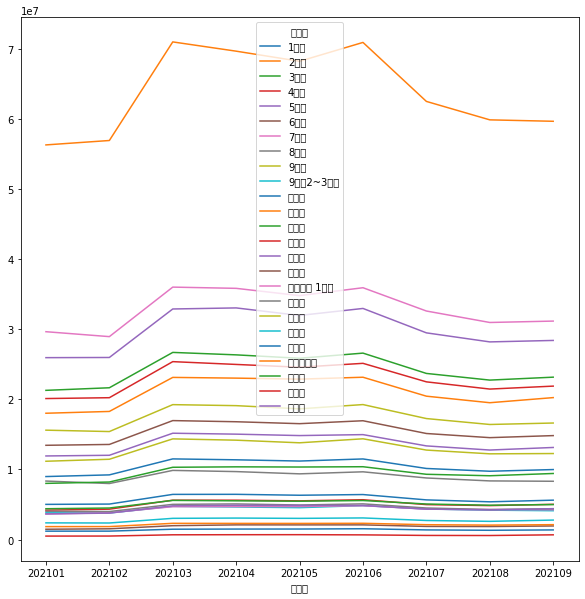

In [43]:
# x축 생성
x_data2 = ["","202101","202102","202103","202104","202105","202106","202107","202108","202109"]

ax = table.plot(figsize=(10,10))
ax.set_xticklabels(x_data2)

<ipython-input-48-55c311d577d0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_data2)


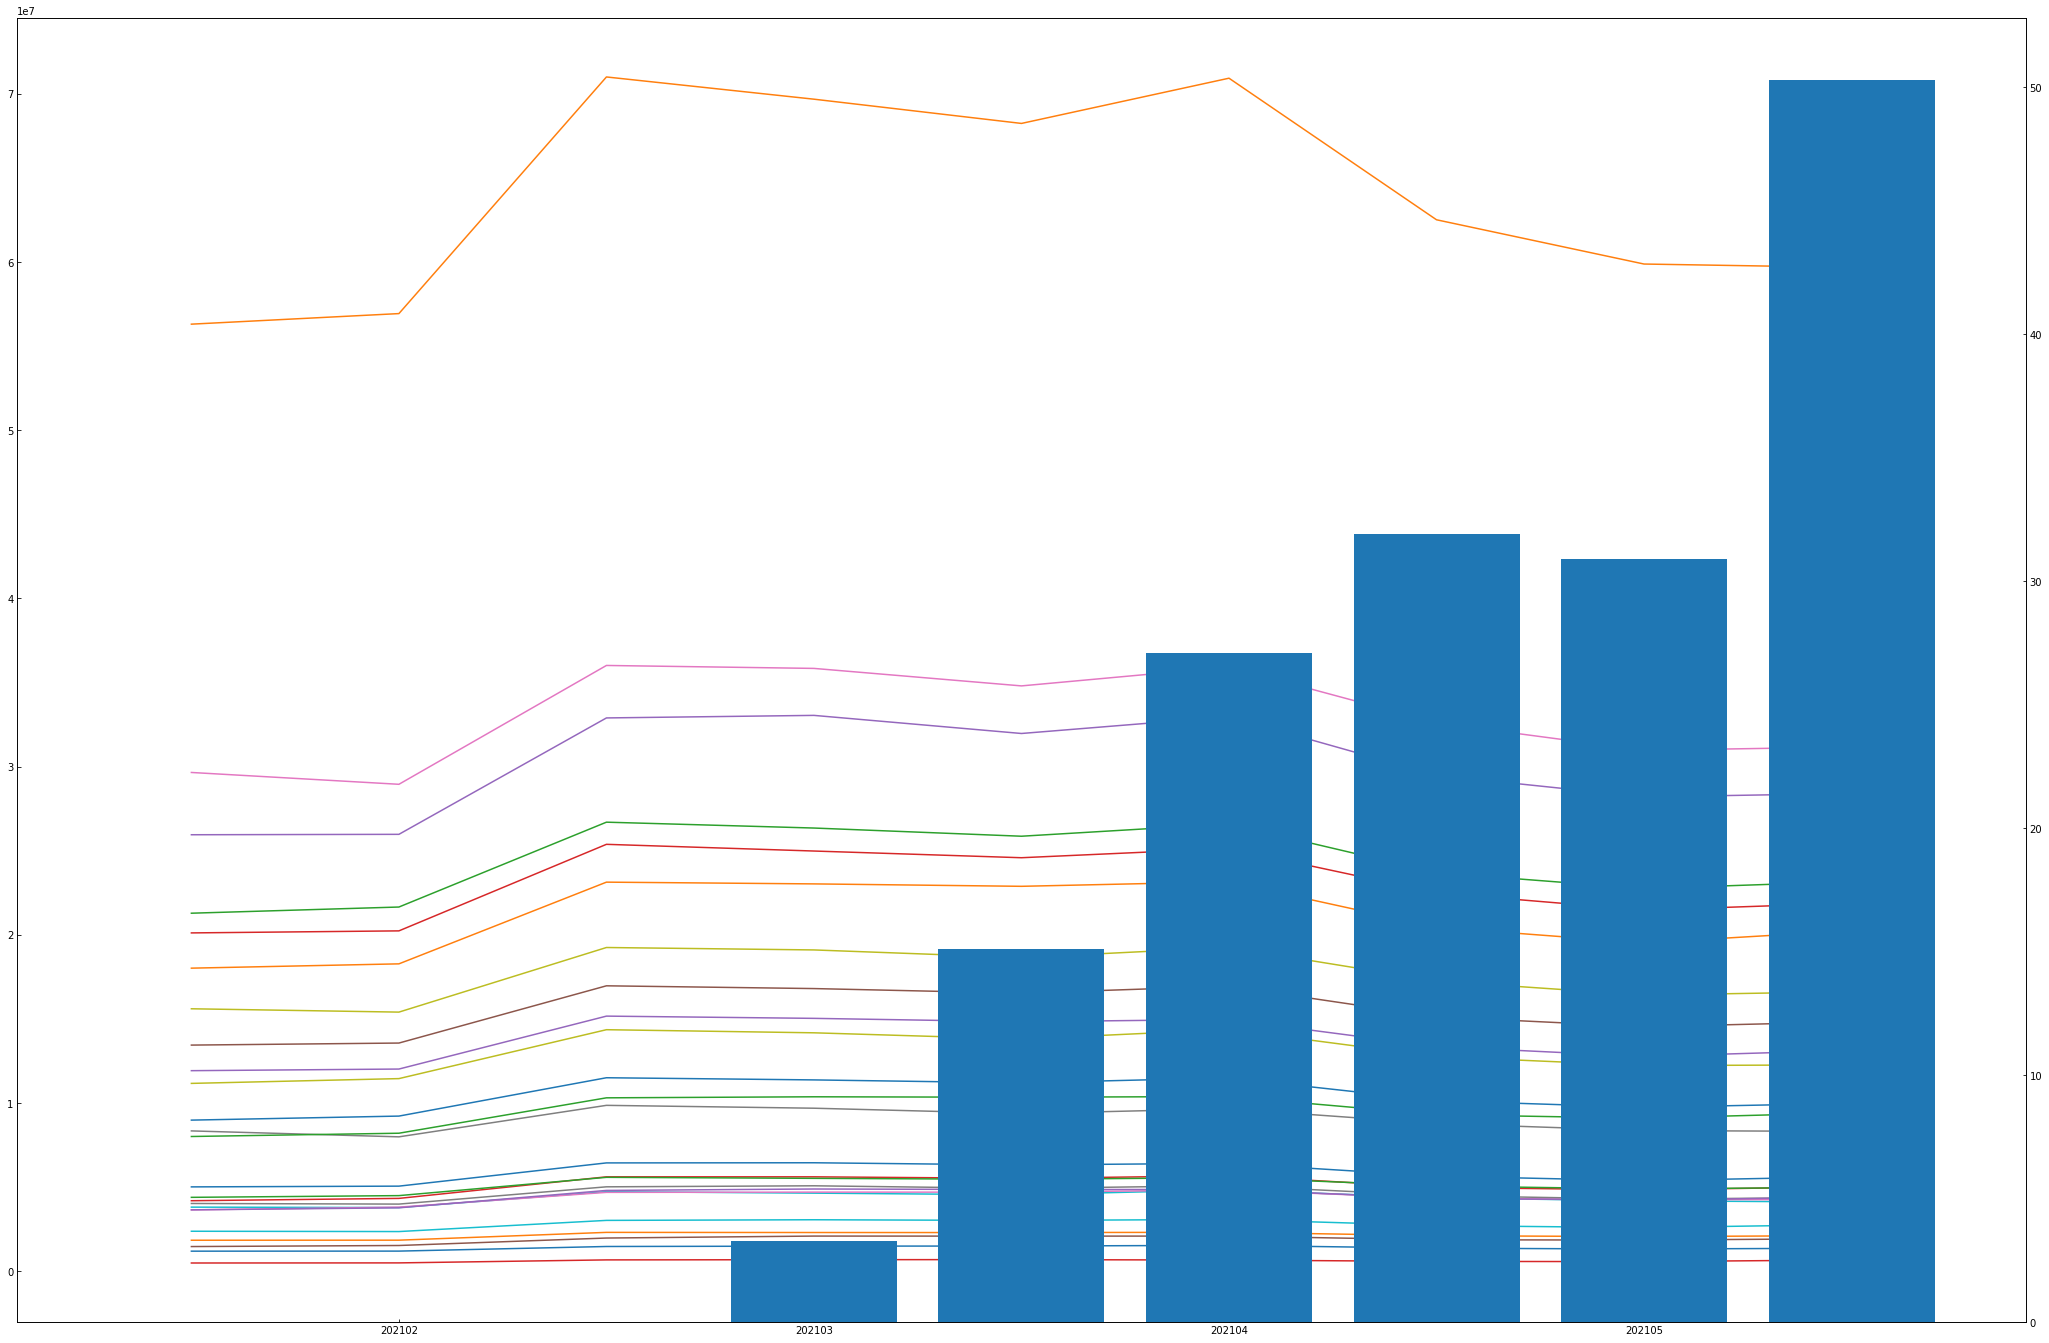

In [48]:
plt.rcParams['figure.figsize']=(36,24)
fig, ax1 = plt.subplots()

ax1.plot(table)
x_data2 = [202101,202102,202103,202104,202105,202106,202107,202108,202109]

# ax1 = table.plot()
ax1.set_xticklabels(x_data2)

ax1.tick_params(axis='both', direction='in')
# x_data2 = ["202101","202102","202103","202104","202105","202106","202107","202108","202109"]

ax2 = ax1.twinx()
ax2.bar(x_data2, y_data)
ax2.tick_params(axis='y', direction='in')